In [1]:
import os
import SimpleITK as sitk
import six
import matplotlib.pyplot as plt
import pydicom
import pydicom.data
import PyQt5
import numpy as np
import os, glob
import pydicom
import pylab as pl
import sys
import matplotlib.path as mplPath
import keyboard
import nibabel as nib
from scipy import ndimage
from radiomics import featureextractor 
from radiomics import imageoperations
from radiomics import glcm
from radiomics import base, cMatrices
from collections import OrderedDict
import nrrd

%matplotlib widget

In [8]:
im = [[4,1,4,2,2],[3,3,3,2,2],[4,2,4,1,1],[4,1,3,3,4],[1,1,4,4,2]]

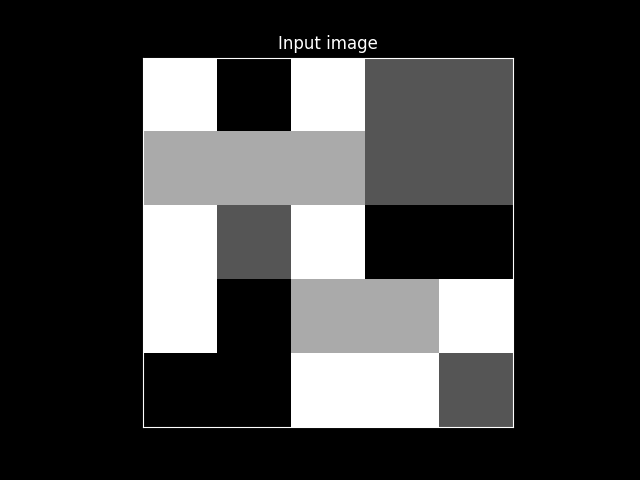

In [9]:
fig,ax = plt.subplots(1,1)
plt.imshow(im)
plt.set_cmap('gray')
plt.style.use('dark_background')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Input image')
plt.show()

In [11]:
input_mask = sitk.GetImageFromArray(np.pad(np.ones_like(im),((1,1),(1,1))))

In [12]:
input = sitk.GetImageFromArray(np.pad(im,((1,1),(1,1))))

In [13]:
# Prepare extractor
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()
featureVector0 = extractor.execute(input,input_mask,voxelBased=True)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 3

In [14]:
input.GetSize()

(7, 7)

In [15]:
input_mask.GetSize()

(7, 7)

In [16]:
g = glcm.RadiomicsGLCM(input,input_mask,voxelBased=True)
g._calculateMatrix()

array([[[[1., 1., 1., 1.]]]])